# SRSE PROJECT
### Analysis of links between French middle schools and high school in Paris academy



Chloé Lavest, Emeline Maire

Ensae Paris - 2021-2022

## Pacakges and functions

In [1]:
import random
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import os
import os.path
import csv

## Data download 

In [2]:
#---------- DATA DOWNLOAD ---------#
wd = os.getcwd()
wd

'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\Git\\code'

In [3]:
os.chdir("..")
os.chdir("..")
temp_wd = os.getcwd()

In [4]:
data_path = temp_wd + "\\data\\"
data_path

data_eleves = [data_path + f for f in os.listdir(data_path)]

In [5]:
data_eleves[1]

'C:\\Users\\chloe\\OneDrive\\Bureau\\3A\\SRSE\\Projet\\data\\eleve19.csv'

In [6]:
for i in data_eleves :
    locals()["_".join(['eleves',i[-6:-4]])] = pd.read_csv(i, sep = ";", dtype = "str") 

## Data preparation

In [7]:
eleves_18['DRES'].unique()

array(['001', '069', '038', '039', '042', '073', '-', '071', '074', '014',
       '999', '058', '072', '007', '036', '030', '088', '084', '093',
       '006', '082', '003', '025', '013', '028', '045', '063', '017',
       '035', '091', '089', '068', '976', '021', '033', '079', '02B',
       '972', '026', '049', '043', '078', '057', '066', '034', '022',
       '973', '011', '067', '076', '005', '027', '018', '044', '085',
       '054', '988', '047', '002', '060', '080', '059', '077', '051',
       '092', '971', '081', '031', '008', '087', '048', '064', '062',
       '095', '052', '061', '083', '090', '053', '075', '974', '019',
       '056', '070', '037', '029', '094', '055', '010', '02A', '978',
       '050', '012', '015', '023', '041', '016', '086', '046', '024',
       '004', '975', '977', '040', '065', '032', '987', '986', '009'],
      dtype=object)

In [8]:
dep_idf = ['095', '078', '091', '092', '093', '094', '077', '075']

In [9]:
acV = ['095', '078', '091', '092']
acC = ['093', '094', '077']

In [10]:
idf_18 = eleves_18[eleves_18['DRES'].isin(dep_idf)]

In [11]:
idf_18['DRES'].unique()

array(['093', '091', '078', '077', '092', '095', '075', '094'],
      dtype=object)

In [12]:
idf_18.loc[(idf_18['DRES'].isin(acV)),
       'Academie'] = 'Versailles'

idf_18.loc[(idf_18['DRES'].isin(acC)),
       'Academie'] = 'Créteil'

idf_18.loc[(idf_18['DRES'] == '075'),
       'Academie'] = 'Paris'

C:\Users\chloe\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\chloe\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
idf_18['Academie'].describe()

count        1123438
unique             3
top       Versailles
freq          542191
Name: Academie, dtype: object

In [14]:
idf_18.groupby('NUM_ETAB').size().reset_index(name='Count').describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5])

,Count
count,3735.000000
mean,300.786613
std,388.969657
min,1.000000
1%,1.000000
5%,1.000000
10%,1.000000
20%,1.000000
25%,1.000000
30%,2.000000


In [15]:
etabs = [i for i in idf_18['NUM_ETAB'].unique() if len(idf_18.query("NUM_ETAB == " + "'" + i + "'")) > 4]
len(etabs)

2177

In [16]:
etabs[1]

'0020012C'

In [17]:
lower_classes = ['10', '21', '22', '52', '53', '54', '55', '56', '62', '63', '64', '65', '67', '68', '69', '81', '85', '86']
nationalities = []
grade_middleschool = []
grade_highschool = []

In [18]:
df_etab = idf_18.query("NUM_ETAB == '0020012C'")

In [19]:
df_etab.describe()

,AN_SCO,SI_SCO,SEXE,AGE,NATIO_G,REGIME,RESP_G,PCS1,DRES,NUM_ETAB,...,OPT2,OPT3,OPT4,SECTEURP,NUMETABP,GEOSTATP,NATUREP,MEFST6P,GR_NSFP,Academie
count,13,13,13,13,13,13,13,13,13,13,...,9,0,0,13,13,13,13,13,13,13
unique,1,1,2,6,1,3,1,10,3,1,...,2,0,0,1,6,2,4,8,6,2
top,2018,1,2,17,1,3,2,62,077,0020012C,...,030602,NaN,NaN,1,0020012C,11120002,306,238100,100,Créteil
freq,13,13,10,4,13,6,13,2,11,13,...,7,NaN,NaN,13,8,9,9,3,4,12


In [20]:
df_etab['PCS1'].describe()

count     13
unique    10
top       62
freq       2
Name: PCS1, dtype: object

In [36]:
#list_etab = {}
list_attr = [[]]*2177
counter = 0 

for etab in etabs:
    #etab = {'etab' : i}
    cond = "NUM_ETAB == " + "'" + etab + "'"
    df_etab = idf_18.query(cond)
    df_etab.loc[(df_etab['PCS1'].isin(lower_classes)), 'lwr_class'] = 1
    df_etab['perc_french'] = len(df_etab.query("NATIO_G == '1'"))/len(df_etab)
    df_etab['perc_lwrclass'] = len(df_etab.query('lwr_class == 1'))/len(df_etab)
    df_etab['sex_ratio'] = len(df_etab.query("SEXE == '2'"))/len(df_etab)
    attrs = {'class' :df_etab['perc_lwrclass'].max(), 'french' : df_etab['perc_french'].max(),
             'sex' : df_etab['sex_ratio'].max()}
    list_etab[etab] = attrs
    list_attr[counter].append([etab, df_etab['perc_lwrclass'].max(), 
                      df_etab['perc_french'].max(), df_etab['sex_ratio'].max()])
    counter = counter+1
    
 

<ipython-input-36-de0bbe09a2de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_french'] = len(df_etab.query("NATIO_G == '1'"))/len(df_etab)
<ipython-input-36-de0bbe09a2de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_lwrclass'] = len(df_etab.query('lwr_class == 1'))/len(df_etab)
<ipython-input-36-de0bbe09a2de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [39]:
list_etab

{'0020011B': {'class': 0.42857142857142855,
  'french': 1.0,
  'sex': 0.8571428571428571},
 '0020012C': {'class': 0.46153846153846156,
  'french': 1.0,
  'sex': 0.7692307692307693},
 '0020025S': {'class': 0.6666666666666666,
  'french': 1.0,
  'sex': 0.6666666666666666},
 '0020048S': {'class': 0.23076923076923078,
  'french': 1.0,
  'sex': 0.6153846153846154},
 '0020050U': {'class': 0.3333333333333333, 'french': 1.0, 'sex': 0.0},
 '0020051V': {'class': 0.5555555555555556,
  'french': 1.0,
  'sex': 0.3333333333333333},
 '0020468Y': {'class': 0.4, 'french': 1.0, 'sex': 0.4},
 '0021476U': {'class': 0.375, 'french': 0.875, 'sex': 0.0},
 '0021869W': {'class': 0.6153846153846154,
  'french': 0.7692307692307693,
  'sex': 0.46153846153846156},
 '0021906L': {'class': 0.4583333333333333, 'french': 1.0, 'sex': 0.25},
 '0021939X': {'class': 0.5555555555555556,
  'french': 1.0,
  'sex': 0.2222222222222222},
 '0021946E': {'class': 0.8, 'french': 1.0, 'sex': 1.0},
 '0022108F': {'class': 0.22222222222

In [ ]:
list_attr

In [41]:
f = open("dict.txt","w")
f.write( str(list_etab) )
f.close()

In [42]:
g = open("dict_attr.txt","w")
g.write( str(list_attr) )
g.close()

In [ ]:
liste_seconde = ['221114', '221121', '221131', '221141']
idf_2_18 = idf_18[idf_18['MEFST6'].isin(liste_seconde)]

In [ ]:
# columns that we need to compute the values that are interesting


#### Création du réseau

In [ ]:
eleves_G = nx.Graph()  # start by generating empty graph


eleves_G.add_nodes_from(idf_2_18['NUMETABP'], bipartite=0) # collèges
eleves_G.add_nodes_from(idf_2_18['NUM_ETAB'], bipartite=1) # lycées



In [ ]:
eleves_G.add_edges_from([(Collèges, Lycées) for (Collèges, Lycées)
                          in idf_2_18[['NUMETABP','NUM_ETAB']].to_numpy()])

In [ ]:
print(nx.info(eleves_G))

Graph with 2610 nodes and 14238 edges


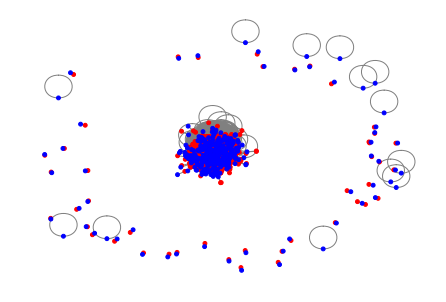

In [ ]:
node_color = []

# then, for each node in the graph
for node in eleves_G.nodes(data=True):
    # if the node has the attribute bipartite = 0 (company), make it red
    if node[1]['bipartite']==0:
        node_color.append('red')
    # if the node has the attribute bipartite = 1 (director), make it blue
    elif node[1]['bipartite']==1:
        node_color.append('blue')

    # draw graph with node attribute color
nx.draw(eleves_G, with_labels=False, node_size = 15, node_color=node_color, edge_color = "gray")